CREDIT CARD FRAUD DETECTION

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
df = pd.read_csv('D:\\CREDIT CARD PROJECT\\creditcard - Copy.csv')

In [4]:
# Display the first few rows
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,168402,1.938832,-0.534758,-0.373828,0.321188,-0.610777,0.081096,-0.822708,0.230803,1.340699,...,0.231138,0.801809,0.158499,0.761816,-0.145671,-0.265818,0.026700,-0.041087,9.99,0
1,168402,1.937136,-0.292658,-1.419070,-0.005123,0.771943,0.908214,-0.195782,0.297219,0.377758,...,-0.203327,-0.397700,0.338929,-1.642499,-0.472062,0.311437,-0.028150,-0.088213,1.29,0
2,168402,-1.070533,1.791658,-1.369373,-0.558080,0.309450,-0.900018,0.226270,0.765973,-0.052564,...,-0.314256,-0.862608,0.179261,0.506013,-0.277090,0.131348,0.208887,0.055672,8.99,0
3,168403,-0.003151,0.645228,0.194264,-0.530639,1.183637,0.523247,0.862919,0.162299,-0.248434,...,-0.069720,0.034194,0.094286,-1.017403,-0.614583,0.115750,0.070270,0.025218,8.51,0
4,168403,2.007143,0.286216,-1.576819,1.388519,0.527841,-1.115518,0.745750,-0.494672,0.008620,...,0.071552,0.471901,-0.027275,0.027612,0.496656,-0.494957,-0.008571,-0.057277,20.22,0


In [5]:
# Display the last  few rows
df.tail()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6056,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
6057,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
6058,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
6059,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
6060,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Display column names and datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    6061 non-null   int64  
 1   V1      6061 non-null   float64
 2   V2      6061 non-null   float64
 3   V3      6061 non-null   float64
 4   V4      6061 non-null   float64
 5   V5      6061 non-null   float64
 6   V6      6061 non-null   float64
 7   V7      6061 non-null   float64
 8   V8      6061 non-null   float64
 9   V9      6061 non-null   float64
 10  V10     6061 non-null   float64
 11  V11     6061 non-null   float64
 12  V12     6061 non-null   float64
 13  V13     6061 non-null   float64
 14  V14     6061 non-null   float64
 15  V15     6061 non-null   float64
 16  V16     6061 non-null   float64
 17  V17     6061 non-null   float64
 18  V18     6061 non-null   float64
 19  V19     6061 non-null   float64
 20  V20     6061 non-null   float64
 21  V21     6061 non-null   float64
 22  

In [7]:

# Display basic statistics
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759072e-12,-8.251146e-13,-9.655448e-13,8.321385e-13,1.649983e-13,4.248434e-13,-3.054696e-13,8.777981e-14,-1.179757e-12,...,-3.405785e-13,-5.723165e-13,-9.725860e-13,1.464148e-12,-6.987110e-13,-5.617884e-13,3.332082e-12,-3.518875e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
# Check for missing values
print(df.isnull().sum())

# Example: Fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<Figure size 432x288 with 0 Axes>

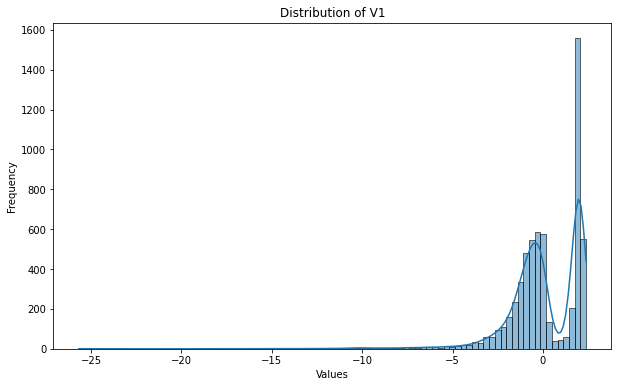

In [6]:
#Visualize the Data
#Visualizations can helps understand the distribution and relationships in data.

# Histogram of a specific column
plt.clf()
plt.figure(figsize=(10, 6))
sns.histplot(df['V1'], kde=True)
plt.title('Distribution of V1')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


<Figure size 432x288 with 0 Axes>

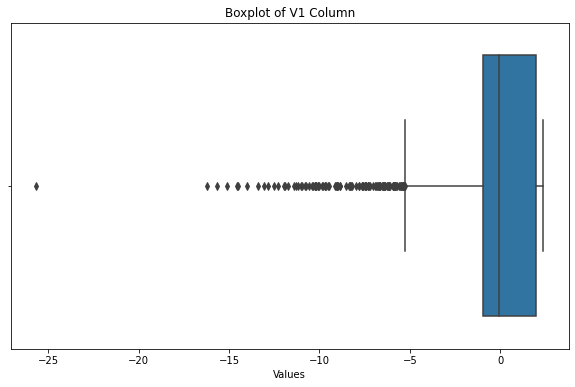

In [7]:
#Boxplot
#To visualize the distribution of a numeric column and identify outliers:

plt.clf()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['V1'])
plt.title('Boxplot of V1 Column')
plt.xlabel('Values')
plt.show()



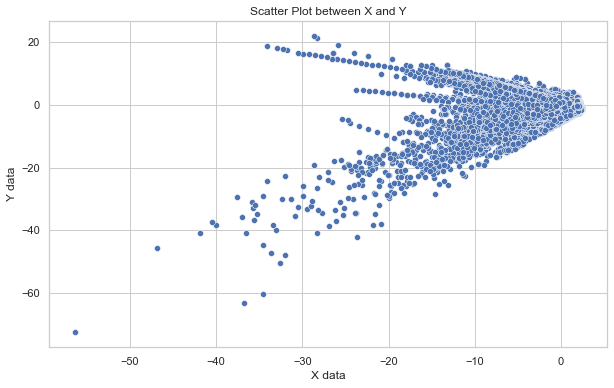

In [32]:
# Scatter plot between two columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['V1'], y=df['V2'])
plt.title('Scatter Plot between X and Y')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.show()


0    6056
1       5
Name: Class, dtype: int64


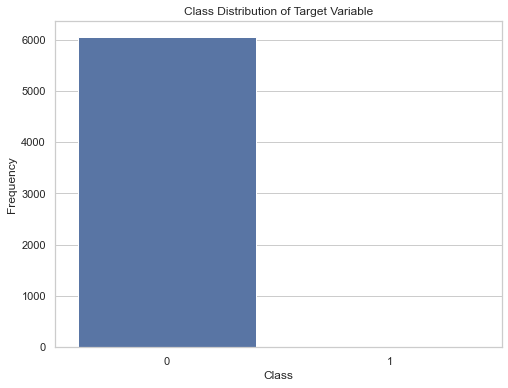

In [8]:
#Checking the class distribution of the target variable


# Check the class distribution of the target variable
class_distribution = df['Class'].value_counts()
print(class_distribution)

# Visualize the class distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

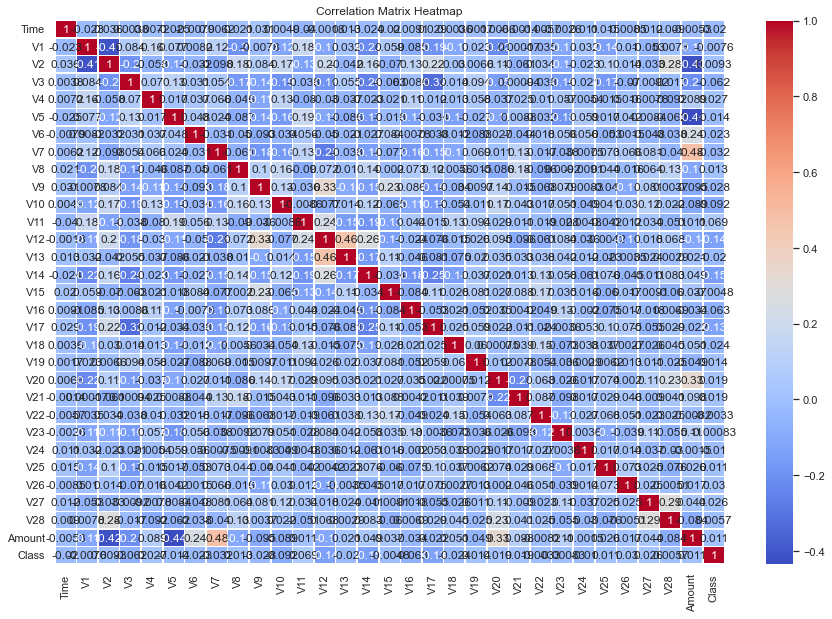

In [9]:
# Finding correlation and plotting Heat Map


# Compute the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

   feature  importance
17     V17    0.185978
12     V12    0.163752
14     V14    0.161724
11     V11    0.090081
10     V10    0.081524
18     V18    0.026857
16     V16    0.023463
7       V7    0.023312
26     V26    0.023086
13     V13    0.022764
29  Amount    0.021853
19     V19    0.021531
6       V6    0.016776
8       V8    0.016361
15     V15    0.015453
3       V3    0.014464
5       V5    0.013260
27     V27    0.012257
23     V23    0.011793
22     V22    0.010231
1       V1    0.007289
20     V20    0.007011
25     V25    0.005305
21     V21    0.004928
9       V9    0.004886
0     Time    0.003903
24     V24    0.003582
2       V2    0.003500
28     V28    0.002598
4       V4    0.000479


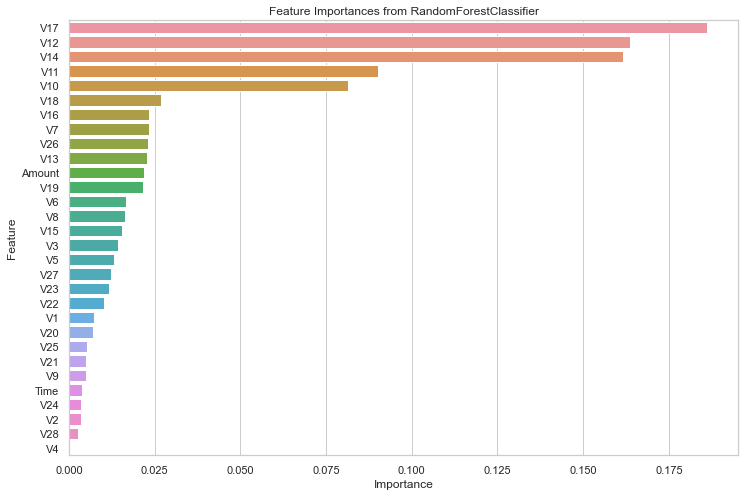

In [10]:

# Performing Feature engineering

# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

print(importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [7]:
# Define the Algorithms and Parameter Grids
# Define the classifiers
classifiers = {
    #'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    #'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
}


In [8]:
# Define the parameter grids for each classifier
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'poly', 'sigmoid']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'NaiveBayes': {
        # No hyperparameters to tune for GaussianNB
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

In [9]:

#######
# Balance the Data Using SMOTE
#######


# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=min(2, X_train.shape[0]-1))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training DecisionTree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training NaiveBayes...
Training KNN...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Score for LogisticRegression: 0.9990711008746622
Best Parameters for DecisionTree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score for DecisionTree: 0.9996904024767801
Best Parameters for NaiveBayes: Default parameters
Best Cross-Validation Score for NaiveBayes: 0.9497316267547481
Best Parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Score for KNN: 0.985239587778703
Evaluating LogisticRegression on the training set...
Evaluating LogisticRegression on the test set...
Evaluating DecisionTree on the training set...
Evalu

C:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating KNN on the test set...

Train and Test Accuracy for each classifier:
LogisticRegression - Train accuracy: 0.9993 | Test accuracy: 0.9984
DecisionTree - Train accuracy: 0.9999 | Test accuracy: 0.9992
NaiveBayes - Train accuracy: 0.9497 | Test accuracy: 1.0000
KNN - Train accuracy: 1.0000 | Test accuracy: 0.9654

Train and Test Precision for each classifier:
LogisticRegression - Train precision: 0.9993 | Test precision: 0.9995
DecisionTree - Train precision: 0.9999 | Test precision: 0.9984
NaiveBayes - Train precision: 0.9543 | Test precision: 1.0000
KNN - Train precision: 1.0000 | Test precision: 0.9983

Train and Test Recall for each classifier:
LogisticRegression - Train recall: 0.9993 | Test recall: 0.9984
DecisionTree - Train recall: 0.9999 | Test recall: 0.9992
NaiveBayes - Train recall: 0.9497 | Test recall: 1.0000
KNN - Train recall: 1.0000 | Test recall: 0.9654

Train and Test F1_score for each classifier:
LogisticRegression - Train f1_score: 0.9993 | Test f1_score: 0

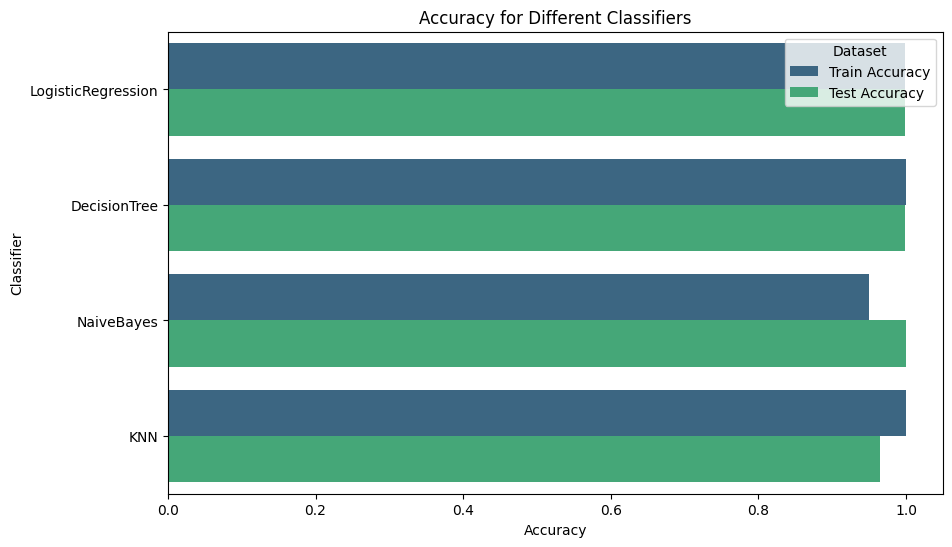

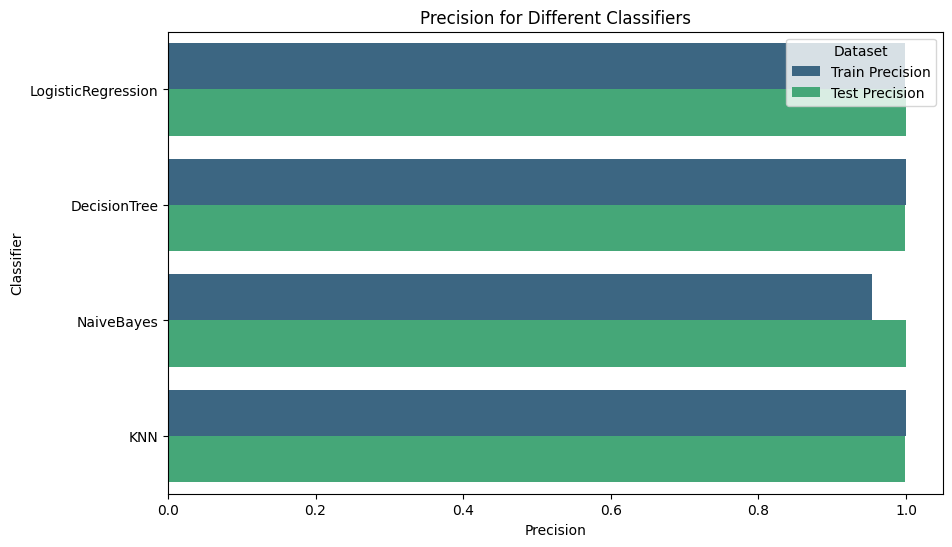

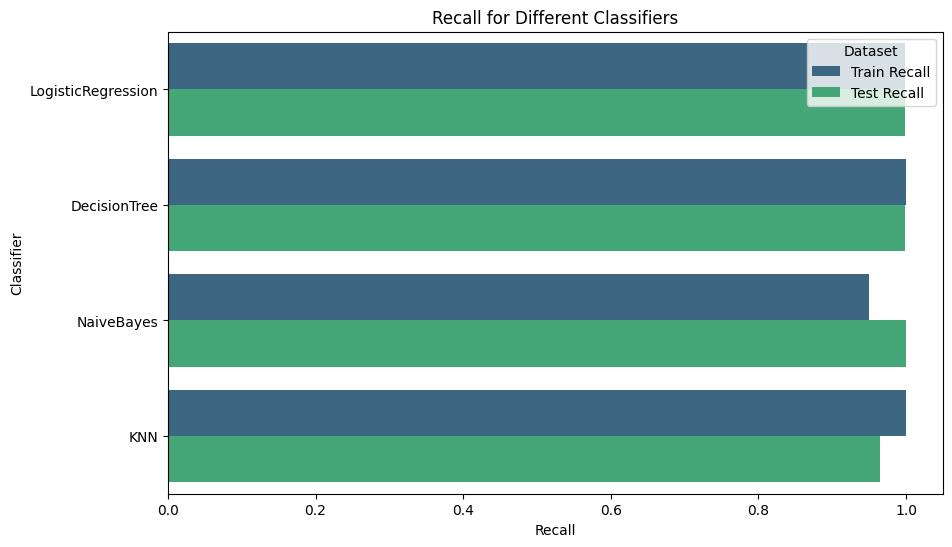

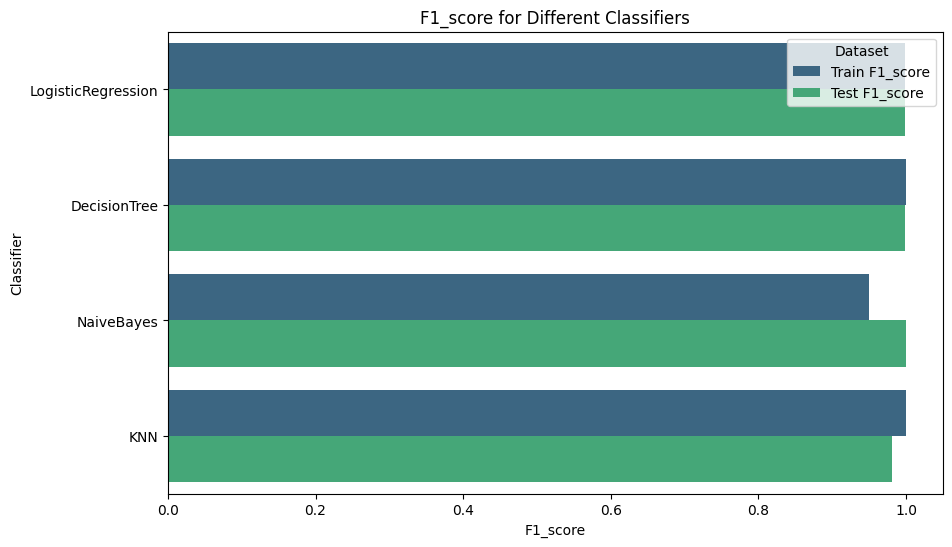

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Initialize dictionaries to store the best models and their parameters and scores
best_models = {}
best_params = {}
best_scores = {}

# Perform GridSearchCV for each classifier
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    if param_grids[clf_name]:  # Check if there are parameters to tune
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[clf_name], cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
        grid_search.fit(X_train_smote, y_train_smote)
        
        best_models[clf_name] = grid_search.best_estimator_
        best_params[clf_name] = grid_search.best_params_
        best_scores[clf_name] = grid_search.best_score_
    else:
        clf.fit(X_train_smote, y_train_smote)
        best_models[clf_name] = clf
        best_params[clf_name] = "Default parameters"
        best_scores[clf_name] = clf.score(X_train_smote, y_train_smote)

    # Save the best model using pickle
    with open(f'{clf_name}_best_model.pkl', 'wb') as f:
        pickle.dump(best_models[clf_name], f)

# Print the best parameters and scores for each classifier
for clf_name in best_models.keys():
    print(f"Best Parameters for {clf_name}: {best_params[clf_name]}")
    print(f"Best Cross-Validation Score for {clf_name}: {best_scores[clf_name]}")

# Initialize dictionaries to store the metrics
metrics = {
    'train_accuracy': {},
    'test_accuracy': {},
    'train_precision': {},
    'test_precision': {},
    'train_recall': {},
    'test_recall': {},
    'train_f1_score': {},
    'test_f1_score': {}
}

# Evaluate the best models on both training and test sets
for clf_name, clf in best_models.items():
    print(f"Evaluating {clf_name} on the training set...")
    y_train_pred = clf.predict(X_train_smote)
    metrics['train_accuracy'][clf_name] = accuracy_score(y_train_smote, y_train_pred)
    metrics['train_precision'][clf_name] = precision_score(y_train_smote, y_train_pred, average='weighted')
    metrics['train_recall'][clf_name] = recall_score(y_train_smote, y_train_pred, average='weighted')
    metrics['train_f1_score'][clf_name] = f1_score(y_train_smote, y_train_pred, average='weighted')

    print(f"Evaluating {clf_name} on the test set...")
    y_test_pred = clf.predict(X_test)
    metrics['test_accuracy'][clf_name] = accuracy_score(y_test, y_test_pred)
    metrics['test_precision'][clf_name] = precision_score(y_test, y_test_pred, average='weighted')
    metrics['test_recall'][clf_name] = recall_score(y_test, y_test_pred, average='weighted')
    metrics['test_f1_score'][clf_name] = f1_score(y_test, y_test_pred, average='weighted')

# Print the metrics
for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
    print(f"\nTrain and Test {metric.capitalize()} for each classifier:")
    for clf_name in best_models.keys():
        print(f"{clf_name} - Train {metric}: {metrics[f'train_{metric}'][clf_name]:.4f} | Test {metric}: {metrics[f'test_{metric}'][clf_name]:.4f}")

# Function to plot the metrics
def plot_metrics(metrics, metric_name):
    
    train_metric_df = pd.DataFrame(list(metrics[f'train_{metric_name}'].items()), columns=['Classifier', f'Train {metric_name.capitalize()}'])
    test_metric_df = pd.DataFrame(list(metrics[f'test_{metric_name}'].items()), columns=['Classifier', f'Test {metric_name.capitalize()}'])

    metric_df = pd.merge(train_metric_df, test_metric_df, on='Classifier')
    metric_df = metric_df.melt(id_vars='Classifier', value_vars=[f'Train {metric_name.capitalize()}', f'Test {metric_name.capitalize()}'], var_name='Dataset', value_name=metric_name.capitalize())

    # Plot the metric
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metric_name.capitalize(), y='Classifier', hue='Dataset', data=metric_df, palette='viridis')
    plt.title(f'{metric_name.capitalize()} for Different Classifiers')
    plt.xlabel(metric_name.capitalize())
    plt.ylabel('Classifier')
    plt.show()

# Plot each metric
for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
    plot_metrics(metrics, metric)

# CONCLUSION
In the oversample cases, of all the models we build found that the Decision tree model and it gave us the best accuracy is 0.999